#### Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf

### 1. Implementing neural networks from scratch

##### SIGMOID ACTIVATION FUNCTION

In [6]:
def sigmoid (z) :
    return 1.0 / (1 + np.exp (-z))

def sigmoid_derivative (z):
    return sigmoid(z) * (1.0 - sigmoid(z))

In [7]:
import numpy as np
def train(X,y,n_hidden,learning_rate,n_iter):
  m,n_input=X.shape
  W1=np.random.randn(n_input,n_hidden)
  b1=np.zeros((1,n_hidden))
  W2=np.random.randn(n_hidden,1)
  b2=np.zeros((1,1))
  for i in range(1,n_iter+1):
    Z2=np.matmul(X,W1)+b1
    A2=sigmoid(Z2)
    Z3=np.matmul(A2,W2)+b2
    A3=Z3
    dZ3=A3-y
    dW2=np.matmul(A2.T,dZ3)
    db2=np.sum(dZ3,axis=0,keepdims=True)
    dZ2=np.matmul(dZ3,W2.T)*sigmoid_derivative(Z2)
    dW1=np.matmul(X.T,dZ2)
    db1=np.sum(dZ2,axis=0)
    W2=W2-learning_rate*dW2/m
    b2=b2-learning_rate*db2/m
    W1=W1-learning_rate*dW1/m
    b1=b1-learning_rate*db1/m
    if i%100==0:
      cost=np.mean((y-A3)**2)
      print('Iteration %i,training loss: %f' %(i,cost))
  model={'W1':W1,'b1':b1,'W2':W2,'b2':b2}
  return model

In [9]:
from sklearn import datasets
boston = datasets.load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [10]:
num_test = 10
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
X_train=boston.data[:-num_test,:]
X_train=scaler.fit_transform(X_train)
y_train=boston.target[:-num_test].reshape(-1,1)
X_test=boston.data[-num_test:,:]
X_test=scaler.transform(X_test)
y_test=boston.target[-num_test:]

In [11]:
n_hidden=20
learning_rate=0.1
n_iter=2000
model=train(X_train,y_train,n_hidden,learning_rate,n_iter)

Iteration 100,training loss: 12.557861
Iteration 200,training loss: 8.979626
Iteration 300,training loss: 7.432297
Iteration 400,training loss: 6.526501
Iteration 500,training loss: 5.896850
Iteration 600,training loss: 5.441810
Iteration 700,training loss: 5.094985
Iteration 800,training loss: 4.809929
Iteration 900,training loss: 4.562827
Iteration 1000,training loss: 4.345553
Iteration 1100,training loss: 4.155804
Iteration 1200,training loss: 3.984518
Iteration 1300,training loss: 3.825961
Iteration 1400,training loss: 3.677369
Iteration 1500,training loss: 3.541381
Iteration 1600,training loss: 3.416927
Iteration 1700,training loss: 3.303439
Iteration 1800,training loss: 3.202218
Iteration 1900,training loss: 3.113100
Iteration 2000,training loss: 3.034578


In [12]:
def predict(x,model):
  W1=model['W1']
  b1=model['b1']
  W2=model['W2']
  b2=model['b2']
  A2=sigmoid(np.matmul(x,W1)+b1)
  A3=np.matmul(A2,W2)+b2
  return A3

In [13]:
predictions=predict(X_test,model)

In [14]:
print(predictions)

[[20.97631011]
 [18.59918947]
 [21.88749865]
 [20.99086084]
 [20.83252319]
 [25.83046949]
 [21.82064887]
 [30.52126095]
 [28.24181803]
 [21.75853039]]


In [15]:
print(y_test)

[19.7 18.3 21.2 17.5 16.8 22.4 20.6 23.9 22.  11.9]


### 2. Implementing neural networks with scikit-learn using  MLPRegressor class

In [16]:
from sklearn.neural_network import MLPRegressor
nn_scikit=MLPRegressor(hidden_layer_sizes=(16,8),activation='relu',solver='adam',
                       learning_rate_init=0.001,random_state=42,max_iter=2000)

In [17]:
nn_scikit.fit(X_train,y_train)
predictions=nn_scikit.predict(X_test)
print(predictions)

C:\Users\csruj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16.79582331 18.55538023 21.07961496 19.21362606 18.50955771 23.5608387
 22.27916529 27.11909153 24.70251262 22.05522035]


C:\Users\csruj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
print(np.mean((y_test-predictions)**2))

13.933482332708786


### 3. Implementing neural networks with TensorFlow

In [19]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)

In [20]:
model=keras.Sequential([
    keras.layers.Dense(units=20,activation='relu'),
    keras.layers.Dense(units=8,activation='relu'),
    keras.layers.Dense(units=1)
])

In [21]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.02))

In [22]:
model.fit(X_train,y_train,epochs=300)

Epoch 1/300
16/16 [==============================] - 2s 5ms/step - loss: 346.4948
Epoch 2/300
16/16 [==============================] - 0s 3ms/step - loss: 92.6733
Epoch 3/300
16/16 [==============================] - 0s 3ms/step - loss: 36.7561
Epoch 4/300
16/16 [==============================] - 0s 3ms/step - loss: 25.6756
Epoch 5/300
16/16 [==============================] - 0s 3ms/step - loss: 20.3930
Epoch 6/300
16/16 [==============================] - 0s 4ms/step - loss: 16.9520
Epoch 7/300
16/16 [==============================] - 0s 3ms/step - loss: 14.7282
Epoch 8/300
16/16 [==============================] - 0s 3ms/step - loss: 14.5588
Epoch 9/300
16/16 [==============================] - 0s 3ms/step - loss: 13.0215
Epoch 10/300
16/16 [==============================] - 0s 3ms/step - loss: 11.3592
Epoch 11/300
16/16 [==============================] - 0s 3ms/step - loss: 10.7747
Epoch 12/300
16/16 [==============================] - 0s 3ms/step - loss: 10.5708
Epoch 13/300
16/16 [====

16/16 [==============================] - 0s 3ms/step - loss: 4.7626
Epoch 103/300
16/16 [==============================] - 0s 2ms/step - loss: 4.6771
Epoch 104/300
16/16 [==============================] - 0s 3ms/step - loss: 4.5984
Epoch 105/300
16/16 [==============================] - 0s 4ms/step - loss: 4.7528
Epoch 106/300
16/16 [==============================] - 0s 5ms/step - loss: 4.3195
Epoch 107/300
16/16 [==============================] - 0s 4ms/step - loss: 4.0094
Epoch 108/300
16/16 [==============================] - 0s 4ms/step - loss: 4.2328
Epoch 109/300
16/16 [==============================] - 0s 3ms/step - loss: 3.8392
Epoch 110/300
16/16 [==============================] - 0s 3ms/step - loss: 3.8727
Epoch 111/300
16/16 [==============================] - 0s 4ms/step - loss: 4.3523
Epoch 112/300
16/16 [==============================] - 0s 4ms/step - loss: 3.9183
Epoch 113/300
16/16 [==============================] - 0s 4ms/step - loss: 3.9537
Epoch 114/300
16/16 [=========

16/16 [==============================] - 0s 4ms/step - loss: 3.6810
Epoch 203/300
16/16 [==============================] - 0s 5ms/step - loss: 3.9130
Epoch 204/300
16/16 [==============================] - 0s 3ms/step - loss: 4.1209
Epoch 205/300
16/16 [==============================] - 0s 5ms/step - loss: 4.1404
Epoch 206/300
16/16 [==============================] - 0s 3ms/step - loss: 3.5295
Epoch 207/300
16/16 [==============================] - 0s 3ms/step - loss: 3.2328
Epoch 208/300
16/16 [==============================] - 0s 3ms/step - loss: 3.2562
Epoch 209/300
16/16 [==============================] - 0s 4ms/step - loss: 3.4973
Epoch 210/300
16/16 [==============================] - 0s 4ms/step - loss: 3.5129
Epoch 211/300
16/16 [==============================] - 0s 4ms/step - loss: 3.7475
Epoch 212/300
16/16 [==============================] - 0s 5ms/step - loss: 3.4800
Epoch 213/300
16/16 [==============================] - 0s 4ms/step - loss: 3.3529
Epoch 214/300
16/16 [=========

In [23]:
predictions=model.predict(X_test)[:,0]
print(predictions)

1/1 [==============================] - 0s 164ms/step
[19.664473 20.771053 23.539553 20.329803 22.283506 27.864063 23.160292
 28.070778 26.157429 21.662569]


In [24]:
print(np.mean((y_test-predictions)**2))

21.60559406272172


### 5. Preventing overfitting in neural networks

In [25]:
model=keras.Sequential([keras.layers.Dense(units=32,activation='relu'),
                        tf.keras.layers.Dropout(0.5),
                        keras.layers.Dense(units=1)])

### 6. Predicting stock prices with neural networks

In [26]:
import pandas as pd
my_data=pd.read_csv('20051201_20051210-1.csv',index_col='Date')
my_data

,Open,High,Low,Close,Volume
Date,,,,,
2005-12-01,10806.0,10934.9,10806.0,10912.6,256932865
2005-12-02,10912.0,10921.4,10861.7,10877.5,214888854
2005-12-05,10877.0,10877.0,10810.7,10835.0,237430947
2005-12-06,10835.4,10936.2,10835.4,10856.9,264721465
2005-12-07,10856.9,10868.1,10764.0,10810.9,243543206
2005-12-08,10808.4,10847.2,10729.7,10755.1,253313750
2005-12-09,10751.8,10806.0,10729.9,10778.6,238907145


In [27]:
def add_original_feature(df,df_new):
  df_new['open']=df['Open']
  df_new['open_1']=df['Open'].shift(1)
  df_new['close_1']=df['Close'].shift(1)
  df_new['high_1']=df['High'].shift(1)
  df_new['low_1']=df['Low'].shift(1)
  df_new['volume_1']=df['Volume'].shift(1)

In [28]:
def add_avg_price(df,df_new):
  df_new['avg_price_5']=df['Close'].rolling(5).mean().shift(1)
  df_new['avg_price_30']=df['Close'].rolling(21).mean().shift(1)
  df_new['avg_price_365']=df['Close'].rolling(252).mean().shift(1)
  df_new['ratio_avg_price_5_30']=df_new['avg_price_5']/df_new['avg_price_30']
  df_new['ratio_avg_price_5_365']=df_new['avg_price_5']/df_new['avg_price_365']
  df_new['ratio_avg_price_30_365']=df_new['avg_price_30']/df_new['avg_price_365']

In [29]:
def add_avg_volume(df,df_new):
  df_new['avg_volume_5']=df['Volume'].rolling(5).mean().shift(1)
  df_new['avg_volume_30']=df['Volume'].rolling(21).mean().shift(1)
  df_new['avg_volume_365']=df['Volume'].rolling(252).mean().shift(1)
  df_new['ratio_avg_volume_5_30']=df_new['avg_volume_5']/df_new['avg_volume_30']
  df_new['ratio_avg_volume_5_365']=df_new['avg_volume_5']/df_new['avg_volume_365']
  df_new['ratio_avg_volume_30_365']=df_new['avg_volume_30']/df_new['avg_volume_365']

In [30]:
def add_std_price(df,df_new):
  df_new['std_price_5']=df['Close'].rolling(5).std().shift(1)
  df_new['std_price_30']=df['Close'].rolling(21).std().shift(1)
  df_new['std_price_365']=df['Close'].rolling(252).std().shift(1)
  df_new['ratio_std_price_5_30']=df_new['std_price_5']/df_new['std_price_30']
  df_new['ratio_std_price_5_365']=df_new['std_price_5']/df_new['std_price_365']
  df_new['ratio_std_price_30_365']=df_new['std_price_30']/df_new['std_price_365']

In [31]:
def add_std_volume(df,df_new):
  df_new['std_volume_5']=df['Volume'].rolling(5).std().shift(1)
  df_new['std_volume_30']=df['Volume'].rolling(21).std().shift(1)
  df_new['std_volume_365']=df['Volume'].rolling(252).std().shift(1)
  df_new['ratio_std_volume_5_30']=df_new['std_volume_5']/df_new['std_volume_30']
  df_new['ratio_std_volume_5_365']=df_new['std_volume_5']/df_new['std_volume_365']
  df_new['ratio_std_volume_30_365']= df_new['std_volume_30']/df_new['std_volume_365']

In [32]:
def  add_return_feature(df, df_new):
    df_new['return_1'] = ((df['Close'] - df['Close'].shift (1)) / df['Close'].shift(1)).shift (1)
    df_new['return_5'] = ((df['Close'] - df['Close'].shift (5))/ df['Close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['Close'] - df['Close'].shift (21)) / df['Close'].shift(21)).shift (1)
    df_new['return_365'] = ((df['Close'] - df['Close'].shift(252)) / df['Close'].shift(252)).shift (1)
    df_new['moving_avg_5'] = df_new['return_1'].rolling(5).mean().shift(1)
    df_new['moving_avg_30'] = df_new['return_1'].rolling (21).mean().shift (1)
    df_new[ 'moving_avg 365'] = df_new['return_1'].rolling(252).mean().shift(1)

In [33]:
def generate_features(df):
  """
  Generate features for a stock/index based on historical
  price and performance
  @param df: dataframe with columns "Open","Close","High","Low","Volume"
  @return: dataframe, data set with new features
  """
  df_new=pd.DataFrame()
  #6 original features
  add_original_feature(df,df_new)
  #31 generated features
  add_avg_price(df,df_new)
  add_avg_volume(df,df_new)
  add_std_price(df,df_new)
  add_std_volume(df,df_new)
  add_return_feature(df,df_new)
  # the target
  df_new['close']=df['Close']
  df_new=df_new.dropna(axis=0)
  return df_new

In [34]:
data_raw=pd.read_csv('19880101_20191231-1.csv',index_col='Date')
data_raw

,Open,High,Low,Close,Volume
Date,,,,,
1988-01-04,1950.80,2030.00,1950.80,2015.30,20877900
1988-01-05,2021.40,2075.30,2021.40,2031.50,27195361
1988-01-06,2031.50,2058.20,2012.80,2037.80,18790681
1988-01-07,2037.80,2061.50,2004.60,2051.90,21377283
1988-01-08,2051.90,2058.70,1898.00,1911.30,27445517
...,...,...,...,...,...
2019-12-24,28572.57,28576.80,28503.21,28515.45,86151979
2019-12-26,28539.46,28624.10,28535.15,28621.39,156025977
2019-12-27,28675.34,28701.66,28608.98,28645.26,182181663


In [35]:
data=generate_features(data_raw)

In [36]:
print(data.round(decimals=3).head(5))

              open  open_1  close_1  high_1   low_1    volume_1  avg_price_5  \
Date                                                                           
1989-01-04  2146.6  2168.4   2144.6  2168.4  2127.1  17302883.0      2165.00   
1989-01-05  2177.7  2146.6   2177.7  2183.4  2146.6  15714720.0      2168.00   
1989-01-06  2190.5  2177.7   2190.5  2205.2  2173.0  20303094.0      2172.82   
1989-01-09  2194.3  2190.5   2194.3  2213.8  2182.3  16494441.0      2175.14   
1989-01-10  2199.5  2194.3   2199.5  2209.1  2185.0  18410324.0      2181.32   

            avg_price_30  avg_price_365  ratio_avg_price_5_30  ...  \
Date                                                           ...   
1989-01-04      2150.624       2062.113                 1.007  ...   
1989-01-05      2154.690       2062.668                 1.006  ...   
1989-01-06      2157.867       2063.218                 1.007  ...   
1989-01-09      2160.005       2064.341                 1.007  ...   
1989-01-10      216

#### Training simple neural Network

In [37]:
import pandas as pd
data_raw=pd.read_csv('19880101_20191231-1.csv',index_col='Date')
data=generate_features(data_raw)

In [38]:
start_train='1988-01-01'
end_train='2018-12-31'
start_test='2019-01-01'
end_test='2019-12-31'
data_train=data.loc[start_train:end_train]
X_train=data_train.drop('close',axis=1).values
y_train=data_train['close'].values
data_test=data.loc[start_test:end_test]
X_test=data_test.drop('close',axis=1).values
y_test=data_test['close'].values

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [40]:
X_scaled_train=scaler.fit_transform(X_train)
X_scaled_test=scaler.transform(X_test)


In [41]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model=Sequential([Dense(units=32,activation='relu'),Dense(units=1)])

In [42]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))

In [43]:
model.fit(X_scaled_train,y_train,epochs=100,verbose=True)

Epoch 1/100
237/237 [==============================] - 2s 4ms/step - loss: 32310258.0000
Epoch 2/100
237/237 [==============================] - 1s 3ms/step - loss: 2131570.7500
Epoch 3/100
237/237 [==============================] - 1s 3ms/step - loss: 586503.5625
Epoch 4/100
237/237 [==============================] - 1s 3ms/step - loss: 197089.5000
Epoch 5/100
237/237 [==============================] - 1s 3ms/step - loss: 85373.2812
Epoch 6/100
237/237 [==============================] - 1s 3ms/step - loss: 49304.3438
Epoch 7/100
237/237 [==============================] - 1s 3ms/step - loss: 34109.0820
Epoch 8/100
237/237 [==============================] - 1s 3ms/step - loss: 29021.8867
Epoch 9/100
237/237 [==============================] - 1s 3ms/step - loss: 25096.9277
Epoch 10/100
237/237 [==============================] - 1s 3ms/step - loss: 25496.3594
Epoch 11/100
237/237 [==============================] - 1s 3ms/step - loss: 26475.0371
Epoch 12/100
237/237 [=======================

237/237 [==============================] - 1s 4ms/step - loss: 22997.7695
Epoch 96/100
237/237 [==============================] - 1s 4ms/step - loss: 18944.3633
Epoch 97/100
237/237 [==============================] - 1s 4ms/step - loss: 19505.9785
Epoch 98/100
237/237 [==============================] - 1s 3ms/step - loss: 20573.7754
Epoch 99/100
237/237 [==============================] - 1s 3ms/step - loss: 19664.4805
Epoch 100/100
237/237 [==============================] - 1s 4ms/step - loss: 20582.9844


In [44]:
#predictions
predictions=model.predict(X_scaled_test)
print(predictions)

8/8 [==============================] - 0s 4ms/step
[[23662.762]
 [23679.512]
 [23164.76 ]
 [23852.775]
 [23942.363]
 [24179.451]
 [24210.074]
 [24358.582]
 [24355.748]
 [24312.672]
 [24497.807]
 [24606.756]
 [24806.969]
 [25057.336]
 [24818.727]
 [24990.383]
 [24942.8  ]
 [25055.965]
 [24814.613]
 [25006.95 ]
 [25348.164]
 [25247.219]
 [25369.916]
 [25536.916]
 [25728.678]
 [25659.662]
 [25486.08 ]
 [25480.508]
 [25500.82 ]
 [25846.215]
 [25926.9  ]
 [25844.494]
 [26270.258]
 [26299.582]
 [26347.28 ]
 [26262.14 ]
 [26488.96 ]
 [26538.791]
 [26464.498]
 [26394.418]
 [26345.57 ]
 [26472.695]
 [26215.37 ]
 [26203.31 ]
 [26074.43 ]
 [25828.895]
 [25734.107]
 [25938.48 ]
 [25947.576]
 [26071.96 ]
 [26090.064]
 [26073.41 ]
 [26212.467]
 [26212.547]
 [26034.932]
 [26204.863]
 [25901.082]
 [25968.45 ]
 [26107.832]
 [26063.068]
 [26131.89 ]
 [26413.639]
 [26727.445]
 [26648.566]
 [26694.645]
 [26851.842]
 [26858.723]
 [26735.184]
 [26611.992]
 [26658.496]
 [26683.809]
 [26824.945]
 [26790.06 ]


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f'MSE: {mean_squared_error(y_test,predictions) :.3f}')

print(f'MAE: {mean_absolute_error(y_test, predictions):.3f}')

print(f'R^2: {r2_score(y_test, predictions) : .3f}')

MSE: 204004.201
MAE: 407.055
R^2:  0.824


#### Fine-tuning the neural network

In [46]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp
HP_HIDDEN = hp.HParam('hidden_size', hp.Discrete([64, 32, 16]))
HP_EPOCHS = hp.HParam('epochs', hp.Discrete([300, 1000]))
HP_LEARNING_RATE = hp.HParam('learning_rate', hp.RealInterval (0.01, 0.4))

In [47]:
def train_test_model(hparams, logdir):
    model = Sequential([Dense(units=hparams[HP_HIDDEN], activation='relu'),Dense(units=1)])
    model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(hparams[HP_LEARNING_RATE]),
                  metrics=['mean_squared_error'])
    model.fit(X_scaled_train, y_train,validation_data=(X_scaled_test, y_test),
              epochs=hparams[HP_EPOCHS],verbose=False,
              callbacks=[tf.keras.callbacks.TensorBoard(logdir),
              hp.KerasCallback(logdir,hparams),
              tf.keras.callbacks.EarlyStopping(monitor= 'val_loss',min_delta=0,patience=200, verbose=0,
                                                 mode='auto')])
    _,mse = model.evaluate(X_scaled_test, y_test)
    pred = model.predict(X_scaled_test)
    r2 = r2_score (y_test, pred)
    return mse, r2

In [48]:
def run(hparams, logdir):
    with tf.summary.create_file_writer(logdir).as_default():
        hp.hparams_config(hparams=[HP_HIDDEN, HP_EPOCHS, HP_LEARNING_RATE],
                          metrics=[hp.Metric('mean_squared_error', display_name='mse'),
                                   hp.Metric('r2', display_name='r2')])
        mse, r2 = train_test_model(hparams, logdir)
        tf.summary.scalar('mean_squared_error', mse, step=1)
        tf.summary.scalar('r2', r2, step=1)

In [49]:
session_num = 0
for hidden in HP_HIDDEN.domain.values:
    for epochs in HP_EPOCHS.domain.values:
        for learning_rate in tf.linspace(HP_LEARNING_RATE.domain.min_value, HP_LEARNING_RATE.domain.max_value, 5):
            hparams = {HP_HIDDEN: hidden,
                       HP_EPOCHS: epochs,
                       HP_LEARNING_RATE: float("%.2f" % float(learning_rate)),
                      }
            run_name = "run-%d" % session_num
            print('--- Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            run(hparams, 'logs/hparam_tuning/' + run_name)
            session_num += 1

--- Starting trial: run-0
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.01}
8/8 [==============================] - 0s 3ms/step
--- Starting trial: run-1
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.11}
8/8 [==============================] - 0s 3ms/step
--- Starting trial: run-2
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.21}
8/8 [==============================] - 0s 2ms/step
--- Starting trial: run-3
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.3}
8/8 [==============================] - 0s 3ms/step
--- Starting trial: run-4
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.4}
8/8 [==============================] - 0s 4ms/step
--- Starting trial: run-5
{'hidden_size': 16, 'epochs': 1000, 'learning_rate': 0.01}
8/8 [==============================] - 0s 7ms/step
--- Starting trial: run-6
{'hidden_size': 16, 'epochs': 1000, 'learning_rate': 0.11}
8/8 [==============================] - 0s 4ms/step
--- Starting trial: run-7
{'hidden_size': 16, 'epochs':

In [58]:
%reload_ext tensorboard
%tensorboard --port=6006 --logdir logs/hparam_tuning/

Reusing TensorBoard on port 6006 (pid 13000), started 1 day, 2:49:35 ago. (Use '!kill 13000' to kill it.)

In [59]:
model = Sequential([Dense (units=64, activation='relu'),Dense (units=1)])
model.compile (loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.21))
model.fit(X_scaled_train, y_train, epochs=1000, verbose=False)
predictions = model.predict(X_scaled_test)[:, 0]

8/8 [==============================] - 0s 5ms/step


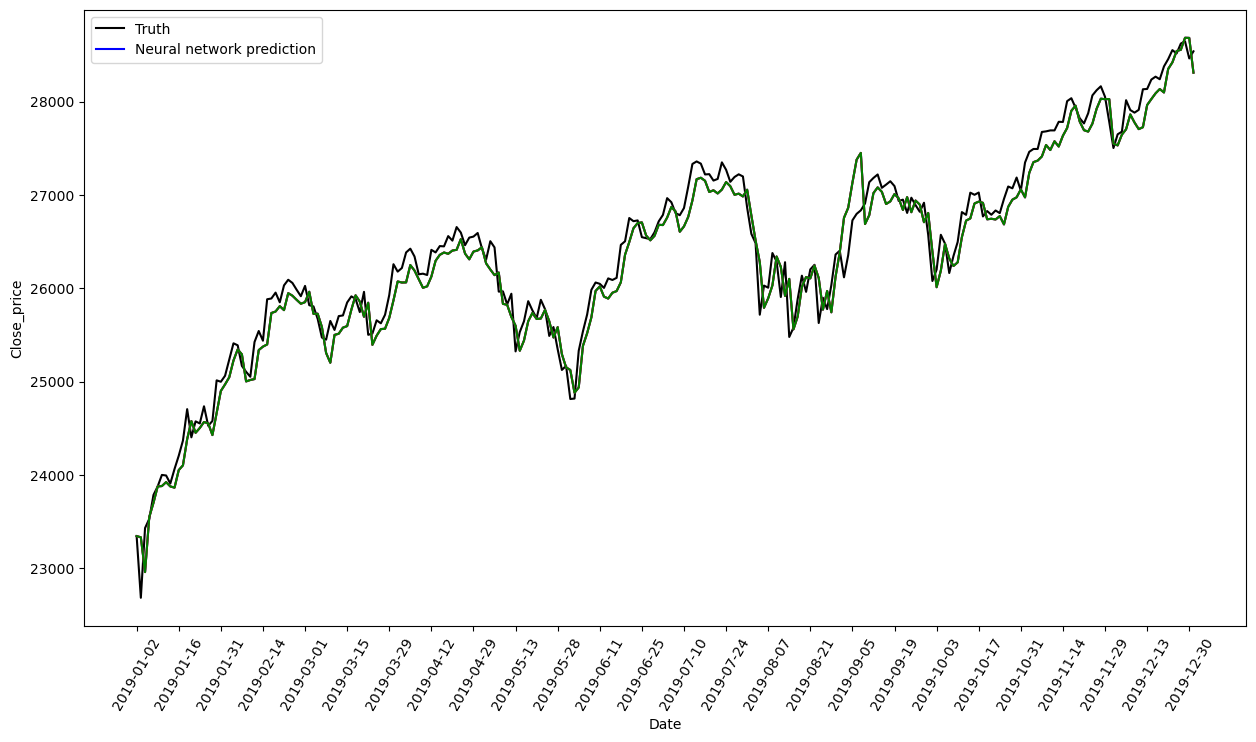

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(data_test.index, y_test, c='k')
plt.plot(data_test.index, predictions, c='b')
plt.plot(data_test.index, predictions, c='r')
plt.plot(data_test.index, predictions, c='g')
plt.xticks(range(0, 252, 10), rotation=60)
plt.xlabel('Date')
plt.ylabel("Close_price")
plt.legend(['Truth','Neural network prediction'])
plt.show()